# House Prices Prediction Project

## Introduction
This notebook presents the end-to-end process of predicting house prices using machine learning. The project involves data exploration, preprocessing, model training, evaluation, and making predictions on a test dataset.

![house](house_prices.jpg)

## Dataset
We start by loading the training dataset and exploring its basic characteristics.

In [1]:
import pyforest
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv(r"E:\Abdelrahman\Projects\Prodigy InfoTech\house_prices\train.csv")

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Display the shape of the DataFrame, indicating the number of rows and columns
df.shape

(1460, 81)

In [5]:
# Display concise information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Generate a summary statistics table transposed for numerical columns in the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
# Display the count of missing values in each column of the DataFrame
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
# Display the total count of missing values in the entire DataFrame
df.isna().sum().sum()

7829

In [9]:
# Display the number of unique values in each column of the DataFrame
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

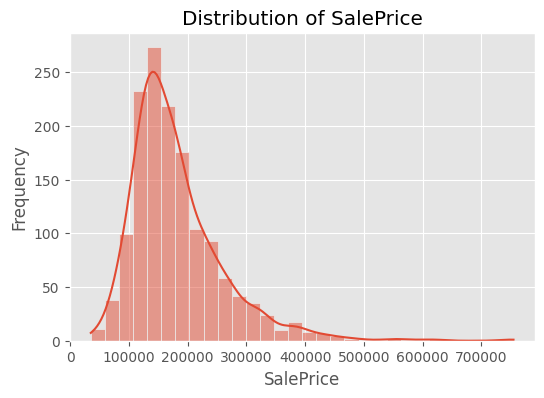

In [10]:
# Visualize the distribution of 'SalePrice'
plt.figure(figsize=(6, 4))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing

In [11]:
# Apply the natural logarithm transformation to the 'SalePrice'
df['LogSalePrice'] = np.log1p(df['SalePrice'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

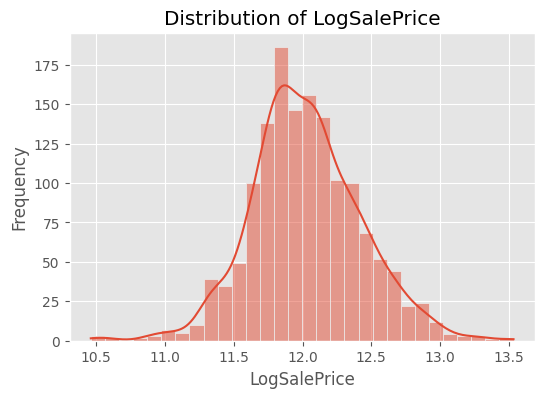

In [12]:
# Visualize the distribution of 'LogSalePrice'
plt.figure(figsize=(6, 4))
sns.histplot(df['LogSalePrice'], bins=30, kde=True)
plt.title('Distribution of LogSalePrice')
plt.xlabel('LogSalePrice')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Replace missing values in numerical columns with the mean
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.mean()))

<IPython.core.display.Javascript object>

In [14]:
# Select some important numerical columns for correlation heatmap
important_num_columns = ['MSSubClass', 'LotFrontage', 'MasVnrArea', 'LotArea', 'TotalBsmtSF', 'SalePrice']
correlation_matrix = df[important_num_columns].corr()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

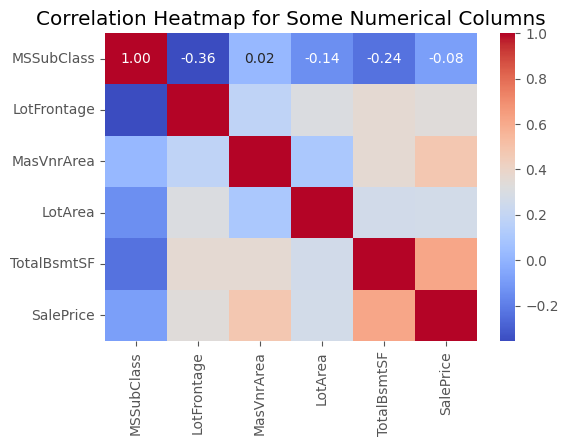

In [15]:
# Plot the correlation heatmap for some important numerical columns
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Some Numerical Columns')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

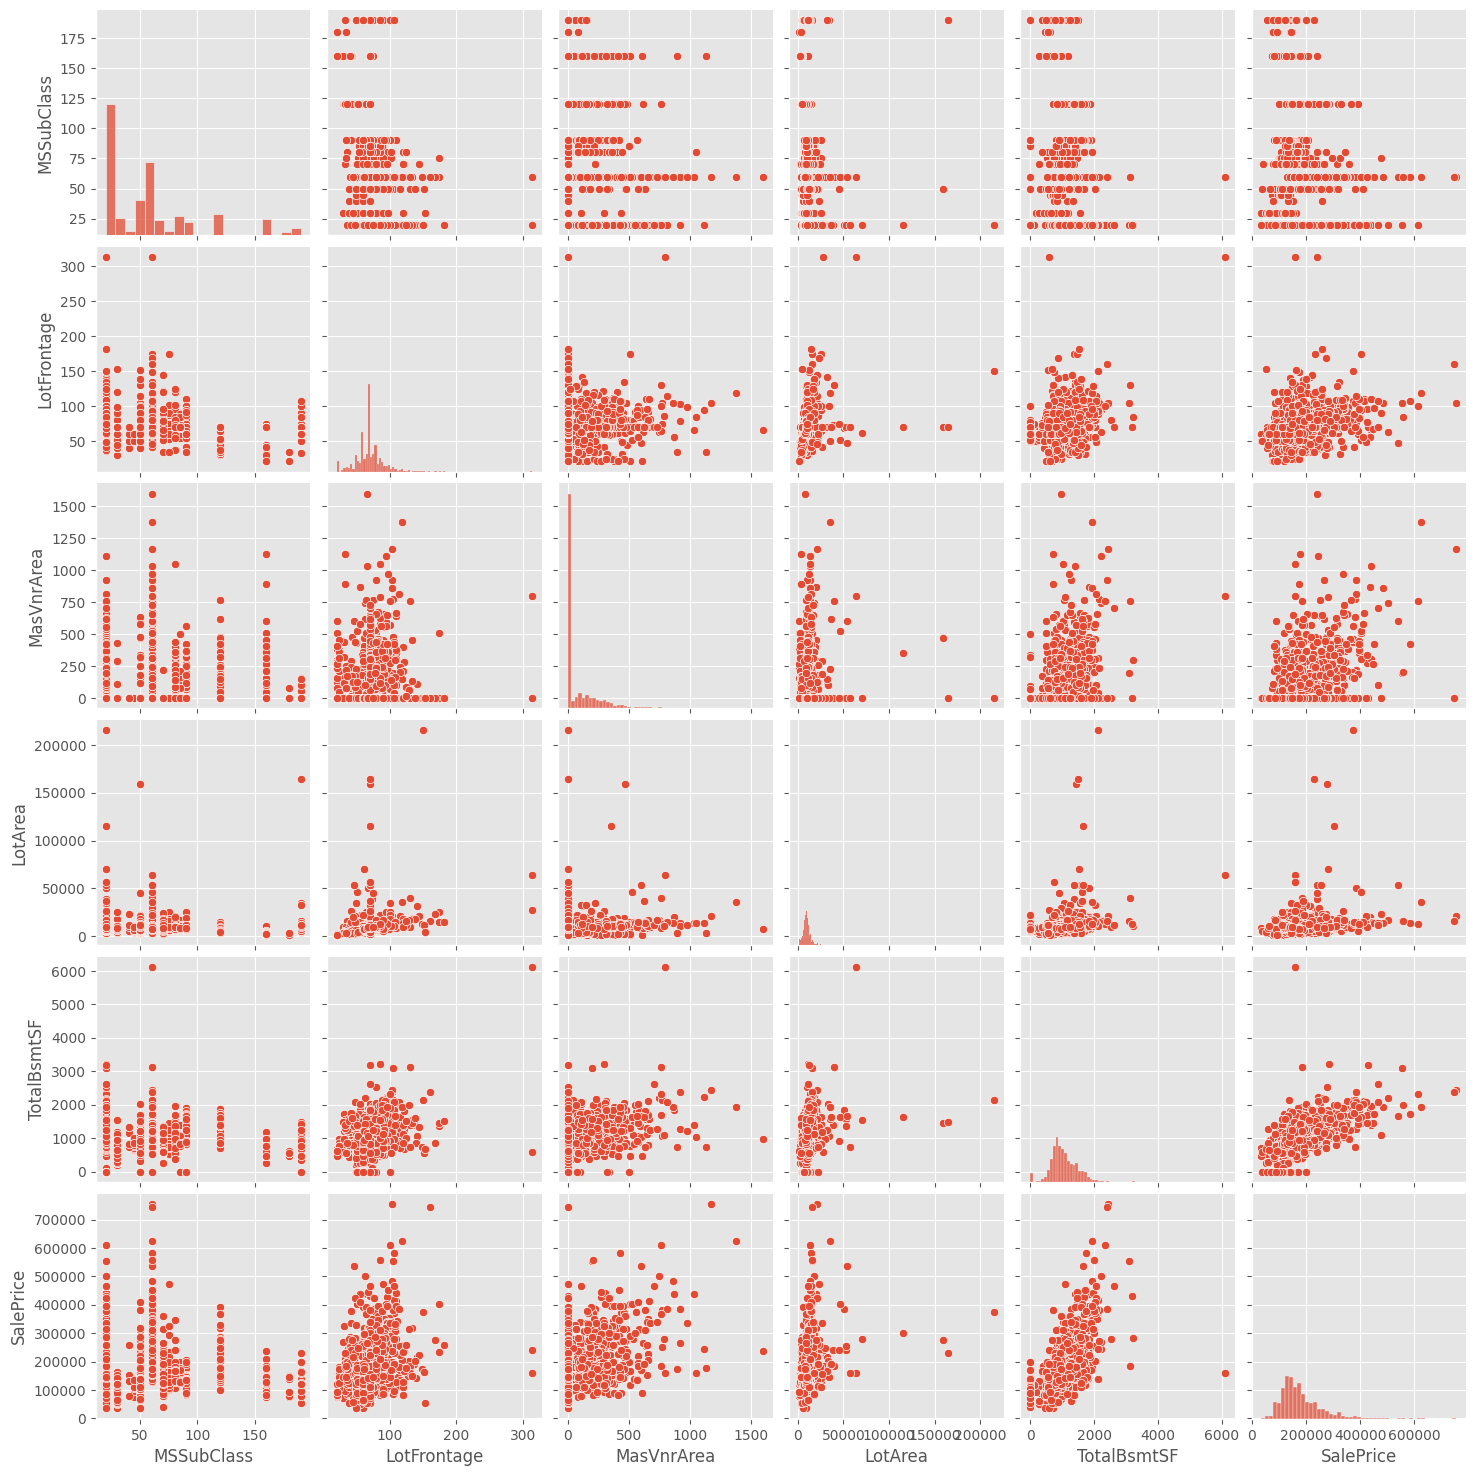

In [16]:
# Make Pair Plot for some important numerical columns
sns.pairplot(df[important_num_columns])
plt.show()

In [17]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [18]:
# Encode categorical variables
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split the data into features (X) and the target variable (y)
X = df.drop(['SalePrice', 'LogSalePrice'], axis=1)
y = df[['LogSalePrice']]

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Training and Evaluation

### Linear Regression Model

In [19]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))

# Print the RMSE values
print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training RMSE: 0.0918422559644547
Validation RMSE: 0.21676881216624125


### Visualize Predictions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

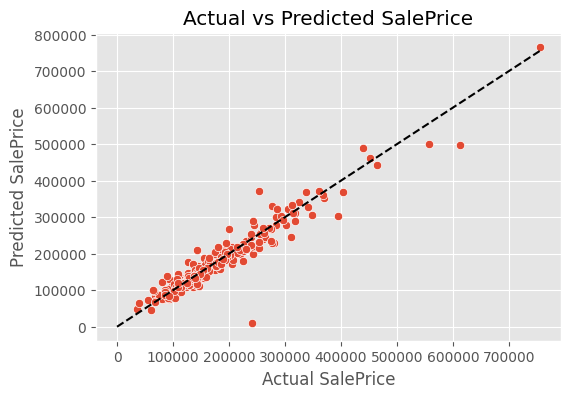

In [20]:
# Scatter plot for LogSalePrice
plt.figure(figsize=(6, 4))
sns.scatterplot(x=np.expm1(y_val['LogSalePrice']), y=np.expm1(val_predictions[:, 0]))
plt.plot([0, max(np.expm1(y_val['LogSalePrice']))], [0, max(np.expm1(y_val['LogSalePrice']))],
         color='black', linestyle='--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

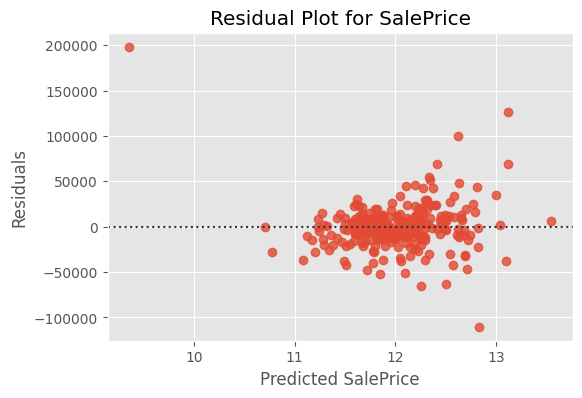

In [21]:
# Residual plots for SalePrice
plt.figure(figsize=(6, 4))
sns.residplot(x=val_predictions[:, 0], y=(np.expm1(y_val['LogSalePrice']) - np.expm1(val_predictions[:, 0])))
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot for SalePrice')
plt.show()

### Ridge Regression Model

In [22]:
# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Create Ridge regression model
ridge_model = Ridge()

# Perform GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best Hyperparameters: {'alpha': 10}


### Final Model

In [23]:
# Train the final model with the best hyperparameters
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)

# Model Evaluation
train_predictions_final = final_model.predict(X_train)
val_predictions_final = final_model.predict(X_val)

train_rmse_final = np.sqrt(mean_squared_error(y_train, train_predictions_final))
val_rmse_final = np.sqrt(mean_squared_error(y_val, val_predictions_final))

# Print the final RMSE values
print("Training RMSE (Final Model):", train_rmse_final)
print("Validation RMSE (Final Model):", val_rmse_final)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training RMSE (Final Model): 0.11301012950110798
Validation RMSE (Final Model): 0.13864020476189798


### Visualize Predictions (Final Model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

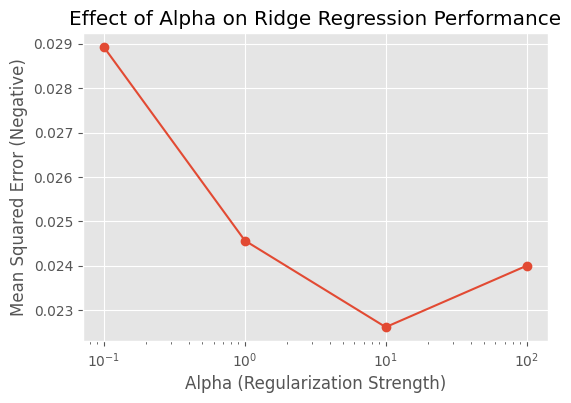

In [24]:
# Extract alpha values and corresponding mean squared error from the grid search results
alphas = [params['alpha'] for params in grid_search.cv_results_['params']]
mse_values = -grid_search.cv_results_['mean_test_score']

# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(alphas, mse_values, marker='o')
plt.xscale('log')  # Use a logarithmic scale for alpha values
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (Negative)')
plt.title('Effect of Alpha on Ridge Regression Performance')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

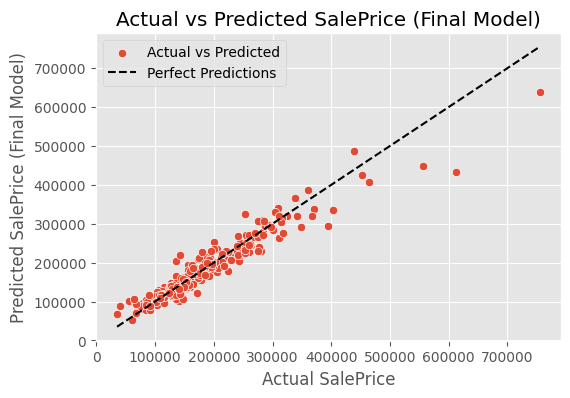

In [25]:
# Scatter plot for LogSalePrice (Final Model)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=np.expm1(y_val['LogSalePrice']), y=np.expm1(val_predictions_final[:, 0]), label='Actual vs Predicted')
plt.plot([min(np.expm1(y_val['LogSalePrice'])), max(np.expm1(y_val['LogSalePrice']))], 
         [min(np.expm1(y_val['LogSalePrice'])), max(np.expm1(y_val['LogSalePrice']))], 
         color='black', linestyle='--', label='Perfect Predictions')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice (Final Model)')
plt.title('Actual vs Predicted SalePrice (Final Model)')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

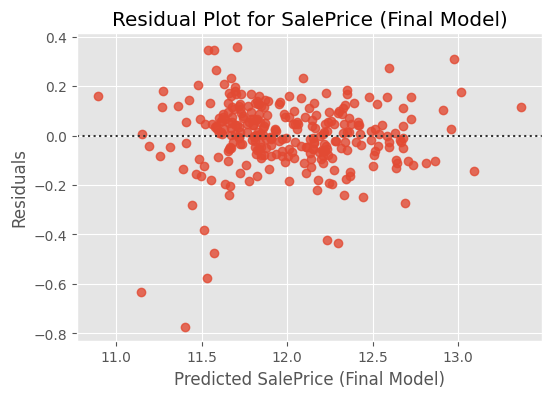

In [26]:
# Residual plots for LogSalePrice (Final Model)
plt.figure(figsize=(6, 4))
sns.residplot(x=val_predictions_final[:, 0], y=(y_val['LogSalePrice'] - val_predictions_final[:, 0]))
plt.xlabel('Predicted SalePrice (Final Model)')
plt.ylabel('Residuals')
plt.title('Residual Plot for SalePrice (Final Model)')
plt.show()

## Make Predictions on Test Data

In [27]:
# Load the test dataset
test_df = pd.read_csv(r"E:\Abdelrahman\Projects\Prodigy InfoTech\house_prices\test.csv")

# Replace missing values in numerical columns with the mean
numerical_columns_test = test_df.select_dtypes(include=[np.number]).columns
test_df[numerical_columns_test] = test_df[numerical_columns_test].apply(lambda x: x.fillna(x.mean()))

# Encode categorical variables
test_df = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)

# Ensure that the test dataset has the same columns as the training dataset
missing_columns = set(X_train.columns) - set(test_df.columns)
for column in missing_columns:
    test_df[column] = 0

# Reorder columns to match the training dataset
test_df = test_df[X_train.columns]

# Make predictions using the trained Ridge model
test_predictions = final_model.predict(test_df)

# Convert the predictions back to the original scale
test_predictions_original_scale = np.expm1(test_predictions)

# Convert the predictions to a DataFrame
test_predictions_df = pd.DataFrame({'Predicted_SalePrice': test_predictions_original_scale[:, 0]})

# Set the index to match the original test dataset
test_predictions_df.set_index(test_df['Id'], inplace=True)

# Display the first few rows of the DataFrame
test_predictions_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Predicted_SalePrice
Id,
1461,105639.185178
1462,137220.322250
1463,159946.127034
1464,181562.636385
1465,187928.938210


In [28]:
# Save the predictions to a CSV file
test_predictions_df.to_csv('sample_submission.csv')

# Conclusion

In this data science project, we embarked on predicting house prices using a variety of machine learning techniques. The project involved extensive data exploration, preprocessing, feature engineering, and model selection. 

# Made by: Abdelrahman Eldaba